C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

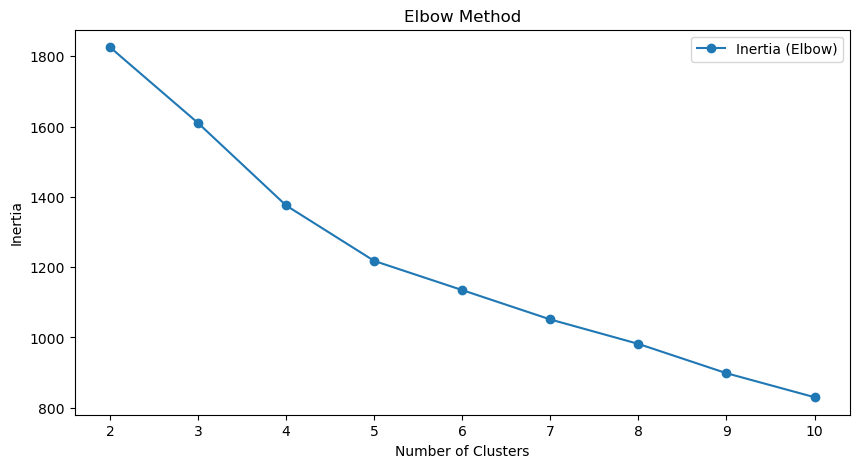

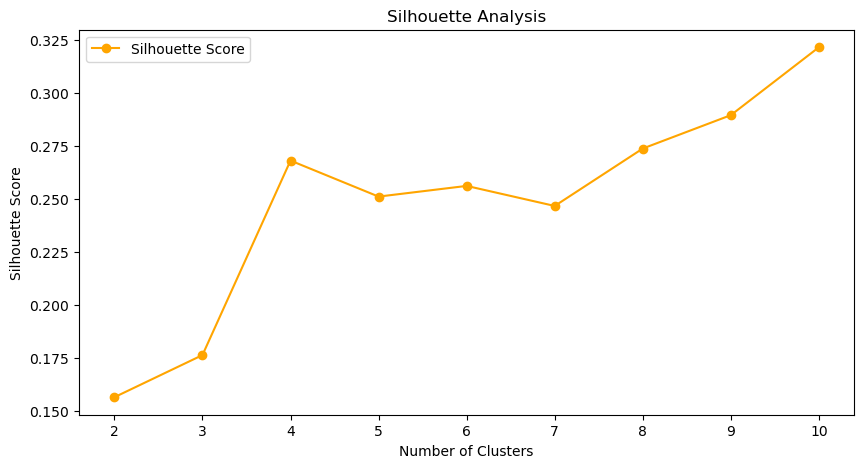

DBSCAN produced 15 clusters (excluding noise points).
Davies-Bouldin Index for DBSCAN: 1.4697048225449367


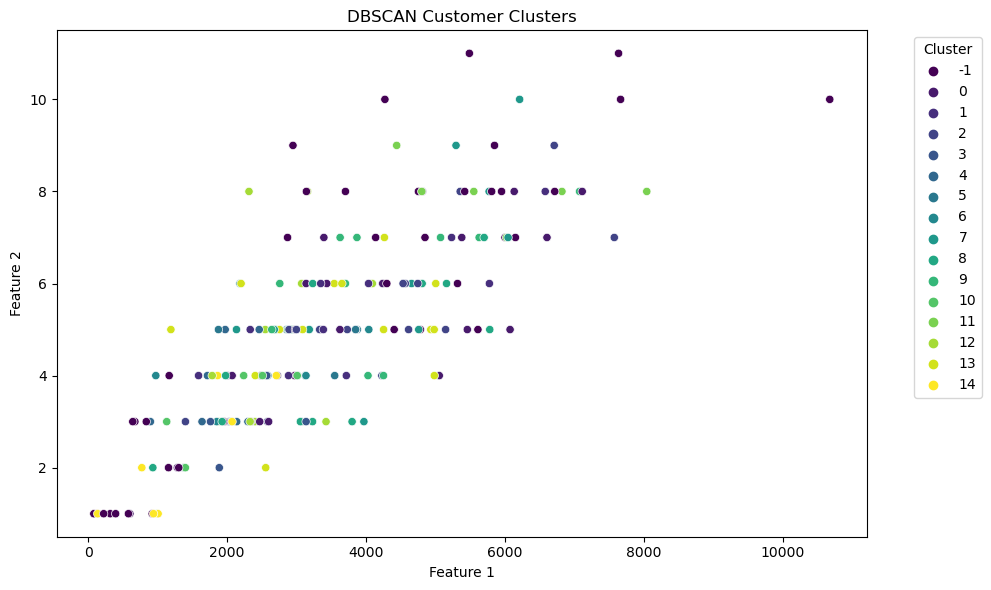

Cluster Summary:
    DBSCAN_Cluster  AvgSpending  AvgTransactions  AvgQuantity  CustomerCount
0               -1  3603.448000         5.550000    13.950000             40
1                0  3848.290476         5.000000    13.095238             21
2                1  3636.425714         5.357143    14.000000             14
3                2  4415.587857         5.642857    15.571429             14
4                3  2328.636667         3.000000     7.166667              6
5                4  1875.405714         3.714286     8.571429              7
6                5  3082.937500         4.500000    10.875000              8
7                6  2587.505556         4.111111    10.333333              9
8                7  4221.445000         6.000000    15.666667             12
9                8  3540.170000         4.416667    10.833333             12
10               9  4023.246667         5.916667    14.083333             12
11              10  1978.282857         3.142857     7.8571

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

# Elbow Method to Determine Optimal Clusters
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Ploting Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, inertia, marker='o', label='Inertia (Elbow)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()
plt.show()

# Ploting Silhouette Analysis
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.legend()
plt.show()

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust eps and min_samples for better results
dbscan_labels = dbscan.fit_predict(scaled_data)

# Handling DBSCAN clusters
unique_clusters = np.unique(dbscan_labels)
print(f"DBSCAN produced {len(unique_clusters) - 1} clusters (excluding noise points).")

# Evaluating DBSCAN Clustering Quality
if len(unique_clusters) > 1:  # DB Index requires more than 1 cluster
    dbscan_db_index = davies_bouldin_score(scaled_data, dbscan_labels)
    print(f"Davies-Bouldin Index for DBSCAN: {dbscan_db_index}")
else:
    print("DBSCAN did not produce valid clusters for DB Index evaluation.")

# Final DBSCAN Cluster Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data.iloc[:, 0],  # First feature
    y=clustering_data.iloc[:, 1],  # Second feature
    hue=dbscan_labels,
    palette='viridis',
    legend='full'
)
plt.title("DBSCAN Customer Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Cluster Insights
cluster_summary = customer_features.copy()
cluster_summary['DBSCAN_Cluster'] = dbscan_labels

# Group by Cluster and Calculating Metrics
cluster_metrics = cluster_summary.groupby('DBSCAN_Cluster').agg(
    AvgSpending=('TotalSpending', 'mean'),
    AvgTransactions=('TotalTransactions', 'mean'),
    AvgQuantity=('TotalQuantity', 'mean'),
    CustomerCount=('CustomerID', 'count')
).reset_index()

print("Cluster Summary:")
print(cluster_metrics)

# Saving Cluster Assignments and Summary
cluster_summary.to_csv("sammed_barwade_Cluster_Assignments.csv", index=False)
cluster_metrics.to_csv("sammed_barwade_Cluster_Summary.csv", index=False)

print("Cluster assignments and summary saved as CSV files.")

